<a href="https://colab.research.google.com/github/joaocbjr/Learn_DataScience/blob/main/Cap_6_An%C3%A1lise_de_Clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___
## Aplicando o K-means
___

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rcParams

from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report

%matplotlib inline
rcParams['figure.figsize'] = 7, 4
plt.style.use('seaborn-whitegrid')

In [2]:
iris = datasets.load_iris()

X = scale(iris.data)
y = pd.DataFrame(iris.target)
y.columns = ['Targets']
variable_names = iris.feature_names
iris_df = pd.DataFrame(iris.data)
iris_df.columns = variable_names

## Construindo e rodando o seu modelo

In [3]:
clustering = KMeans(n_clusters=3, random_state=5).fit(X)

clustering

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

## Graficando o resultado do seu modelo

Text(0.5, 1.0, 'K-Means')

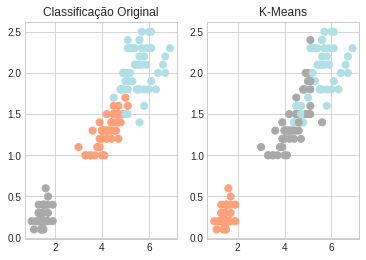

In [4]:
cores = np.array(['darkgray', 'lightsalmon', 'powderblue'])

plt.subplot(1,2,1)
plt.scatter(x=iris_df['petal length (cm)'],
            y=iris_df['petal width (cm)'],
            c=cores[iris.target],
            s=50)
plt.title('Classificação Original')

plt.subplot(1,2,2)
plt.scatter(x=iris_df['petal length (cm)'],
            y=iris_df['petal width (cm)'],
            c=cores[clustering.labels_],
            s=50)
plt.title('K-Means')

Text(0.5, 1.0, 'K-Means')

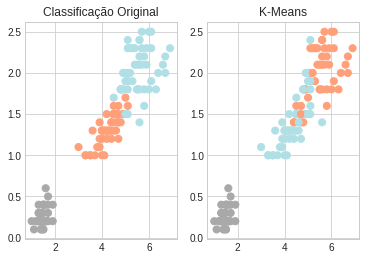

In [5]:
relabel = np.choose(clustering.labels_, [2, 0, 1]).astype(np.int64)

plt.subplot(1,2,1)
plt.scatter(x=iris_df['petal length (cm)'],
            y=iris_df['petal width (cm)'],
            c=cores[iris.target],
            s=50)
plt.title('Classificação Original')

plt.subplot(1,2,2)
plt.scatter(x=iris_df['petal length (cm)'],
            y=iris_df['petal width (cm)'],
            c=cores[relabel],
            s=50)
plt.title('K-Means')

## Avaliando a clusterização resultante

In [6]:
print(classification_report(y, relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.23      0.22      0.23        50
           2       0.26      0.28      0.27        50

    accuracy                           0.50       150
   macro avg       0.50      0.50      0.50       150
weighted avg       0.50      0.50      0.50       150



___
## Métodos Hierárquicos
___

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score


np.set_printoptions(precision=4, suppress=True)
plt.figure(figsize=(10, 3))
%matplotlib inline
plt.style.use('seaborn-whitegrid')

caminho = '/content/mtcars.csv'
carros = pd.read_csv(caminho)
carros.columns = ['nomes','mpg','cyl','disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 
                  'am', 'qtd_marchas', 'carb']

X = carros[['mpg', 'disp', 'hp', 'wt']].values

y = carros['am'].values

### Usando scipy para gerar dendrogramas

In [8]:
Z = linkage(X, 'ward')

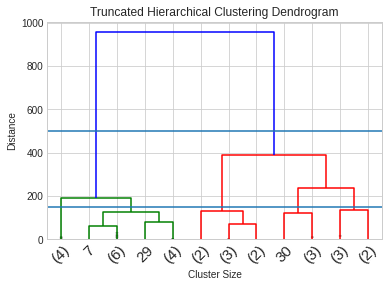

In [9]:
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., 
           leaf_font_size=15., show_contracted=True)

plt.title('Truncated Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.axhline(y=500)
plt.axhline(y=150)
plt.show()

### Gerando clusters hierárquicos

In [10]:
k=2

Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', 
                                      linkage='ward')
Hclustering.fit(X)

accuracy_score(y, Hclustering.labels_)

0.78125

In [11]:
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean',
                                      linkage='complete')
Hclustering.fit(X)

accuracy_score(y, Hclustering.labels_)

0.4375

In [12]:
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', 
                                      linkage='average')
Hclustering.fit(X)

accuracy_score(y, Hclustering.labels_)

0.78125

In [13]:
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='manhattan', 
                                      linkage='average')
Hclustering.fit(X)

accuracy_score(y, Hclustering.labels_)

0.71875

___
## Aprendizado baseado em instância com KNN
___

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rcParams

from sklearn.neighbors import KNeighborsClassifier

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


np.set_printoptions(precision=4, suppress=True) 
%matplotlib inline
rcParams['figure.figsize'] = 7, 4
sns.set_style('whitegrid')

caminho = '/content/mtcars.csv'
carros = pd.read_csv(caminho)
carros.columns = ['nomes','mpg','cyl','disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 
                  'am', 'qtd_marchas', 'carb']

X = carros[['mpg', 'disp', 'hp', 'wt']].values

y = carros['am'].values

Vamos inferir se um carro eh automatico ou manual a partir do consumo de gasolina, disop q eh uma medida de poder do motor, hp nosso horse power e o peso do carro

## Dividindo dados em teste e treino

In [16]:
X = preprocessing.scale(X)

In [17]:
X_treino, X_test, y_treino, y_test = train_test_split(X, y, 
test_size=.33, random_state=17)

## Treinando o modelo

In [18]:
clf = KNeighborsClassifier()

clf.fit(X_treino, y_treino)
print(clf)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


## Avaliando o desempenho do modelo com os dados de teste

alta precisao e baixa revocacao  pouco resultados foram encontrados mas dos que foram encontrados grande parte estava correta, ou seja alta acuracia mas pouca completude

In [19]:
y_esperado = y_test
y_pred = clf.predict(X_test)

print(classification_report(y_esperado, y_pred))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.67      0.80         6

    accuracy                           0.82        11
   macro avg       0.86      0.83      0.82        11
weighted avg       0.87      0.82      0.82        11

